In [1]:
#! /usr/bin/python3

from numpy import *
import math 
import matplotlib.pyplot as plt # from pylab import plot,show
from matplotlib.pyplot import figure

## Método del punto medio modificado (Método de Gragg)

Supongamos que queremos resolver una ecuación diferencial desde un tiempo inicial t hasta un tiempo después t + H (H no necesariamente pequeño), usando n saltos de tamaño

$$ h =H /n$$

cada uno. Partiendo del método del <i>salto de rana (?)</i>, definimos:
\begin{equation}
    x_0 = x(t) \quad \quad (1.a)\\
    y_1 = x_0 + \frac{1}{2}hf(x_0,t) \quad \quad (1.b)
\end{equation}

luego

\begin{equation}
    x_1 = x_0 + hf(x_0,t+\frac{1}{2}h) \quad \quad (2.a)\\
    y_2 = y_1 + hf(x_0,t+h) \quad \quad (2.b) \\
    x_2 = x_1 + hf(x_0,t+\frac{3}{2}h) \quad \quad (2.c)\\ 
    (...)
\end{equation}

Los valores $x_m$ representan la soución en múltiplos enteros de $h$ mientras que los valores $y_m$, en múltiplos medios enteros. En general, tenemos:

\begin{equation}
    x_m = x_m + hf(x_m,t+mh) \quad \quad (3.a)\\
    y_m = y_m + hf(x_{m+1},t+(m+\frac{1}{2}h)) \quad \quad (3.b) 
\end{equation}

Siendo las dos últimas soluciones:

\begin{equation}
    y_n=x(t+H-\frac{1}{2}h)\\
    x_n=x(t+H)  
\end{equation}


Naturalmente, el último paso sería considerar $x_n$ como nuestra solución final para $x(t+H)$, pero podríamos ir aún más allá, podriamos calcular otro valor final a partir de $y_n$. Usando el método anteriormente desarrollado en el que calculamos un valor $v(t+h)$ a partir de $v(t+\frac{1}{2}h)$ (haciendo 
$$v(t+h)= v(t+\frac{1}{2}h) + \frac{1}{2}hf(x(t+h),t+h)$$), obtenemos:

\begin{equation}
    x(t+H)=   y_n +\frac{1}{2}hf(x_n,t+H) \quad \quad (4)
\end{equation}

Por lo que tendremos dos formas de calcular x(t+H). O, es posible combinar (4)y el estimado $x_n=x(t+H)$ y tomar su promedio, de modo que:

\begin{equation}
    x(t+H)= \frac{1}{2}[x_n + y_n +\frac{1}{2}hf(x_n,t+H)] \quad \quad (5)
\end{equation}

Coincidentemente, si calculamos $x(t+H)$ a partir de esta última ecuación, los términos de orden impar que se generaron a partir del método de Euler usado en el paso inicial del calculo con el <i>salto de rana</i>, se cancelan, generando un error (de la ecuación 5) que solo contiene potencias pares de $h$.

Por lo tanto, el método del punto medio modificado, modifica las ecuaciones generadas a partir del método del salto de rana (Ecuaciones 1,3 con 5) para hacer un estimado de $x(t+H)$, el cual genera un error del orden $h^2$.

Aunque no es un método muy usado de forma individual, nos ayuda a desarrollar el método de Bulirsch-Stoer.



In [2]:
''' This function solves the differential equation y'=f(x,y) with the      
   initial condition y=y0 at x = x0.  The return value is the value of    
    the solution y evaluated at x.        
    fuente: http://www.mymathlib.com/c_source/diffeq/other/graggs_method.c [escrito en C]'''

def graggs(x,x_0,y_1,y_0,f,n_1):
    h_1=(x - x_0)/n_1
    h2 =  2*h_1
    y_1=y_0 + h_1*f(x0,y0)

    while n_1>=0 :
        x0 += h_1
        y2 = y0 + h2 * f(x_0,y_1)
        y_0 = y_1
        y_1 = y_2
        n_1-=n_1
    return 0.5 * ( y_0 + y_1 + h * f(x,y_1) )

# Método de Bulirsch-Stoer 

Este método combina dos ideas ya estudiadas: el método del punto medio modificado y la extrapolación de Richardson. 

Nuevamente, partiendo de una ecuación diferencial, por ejemplo, para el caso más simple de una de primer orden.
$$ \frac{dx}{dt} = f(x,t) \quad\quad (6)$$
con condición inicial en un tiempo t, resolvamos esta ecuación en un intervalo de tiempo desde t hasta un tiempo t+H.

Comenzamos por calcular usando el método del punto medio modificado, e inicialmente, considerando un solo paso (n=1) para todo el rango, es decir, el paso, que llamarempos $h_1$ es igual a H, lo cual nos dará una estimación para el valor $x(t+H)$, lo cual denotaremos por $R_{1,1}$. Si H es un intervalo de tiempo grande, entonces $R_{1,1}$ será un estimado poco preciso, sin embargo esto no afectará las siguientes aproximaciones. 

Cuando ya se calculó $R_{1,1}$, repetiremos el cálculo, a partir del tiempo t inicial pero ahora considerando dos pasos para todo el rango, o sea $h_2=\frac{1}{2}H$, lo cual obtendremos una segunda estimación para $x(t+H)$, la cual llamaremos $R_{2,1}$.

Como ya fue estudiado en la sección anterior, el error total que brinda el método del punto medio modificado es una función par del tamaño de paso, por lo tanto:

\begin{equation}
    x(t+H)= R_{2,1} + c_1 h_2^2 + O(h_2^4) \quad\quad (7)
\end{equation}

donde $c_1$ es una constante desconocida. De la misma forma, del primer cálculo, obtenemos

\begin{equation}
    x(t+H)= R_{1,1} + c_1 h_1^2 + O(h_1^4)=  R_{1,1} + 4c_1 h_2^2 + O(h_2^4) \quad\quad (8)
\end{equation}

donde hemos usado el hecho que $h_1=2h_2$. Dado que las ecuaciones 6 y 7 representan la misma expresión, $x(t+H)$, podemos igualarlas, encontrando que:

\begin{equation}
     c_1 h_1^2 = \frac{1}{3} (R_{2,1} - R_{1,1}) \quad\quad (9)
\end{equation}

Sustituyendo (9) en (7), obtenemos:
\begin{equation}
    x(t+H)= R_{2,1} + \frac{1}{3} (R_{2,1} - R_{1,1}) + O(h_2^4) \quad\quad (10)
\end{equation}

O sea, hemos encontrado un nuevo estimado para $x(t+H)$, el cual es mucho más preciso que cualquiera de los dos cálculos aproximados anteriormente$^{1}$. Llamemos a este resultado $R_{2,2}$:

\begin{equation}
    R_{2,2} =R_{2,1} + \frac{1}{3} (R_{2,1} - R_{1,1})  \quad\quad (11)
\end{equation}

podemos ir aún más allá, aunmentando el número de pasos a 3, haciendo el paso $h_3 = \frac{1}{3}H$, y resolviendo a partir del tiempo t hasta t+H nuevamente, donde obtendriamos la aproximación que llamaremos $R_{3,1}$. Luego, siguiendo el procesimiento anterior, conseguiriamos calcular el siguiente aproximado expresado por

\begin{equation}
    R_{3,2} =R_{3,1} + \frac{4}{5} (R_{3,1} - R_{2,1})  \quad\quad (12)
\end{equation}

el cual tiene un error del orden $h_3^4$, lo que nos permite escribir

\begin{equation}
    x(t+H)= R_{3,2}+ c_2 h_3^4 + O(h_3^6)  \quad\quad (13)
\end{equation}

donde $c_2$ es otra constante. Combinando las ecuaciones (10) y (11), obtendremos:

\begin{equation}
    x(t+H)= R_{2,2} + c_2 h_2^4 + O(h_2^3) = R_{2,2} +  \frac{81}{16} c_2 h_3^4 + O(h_3^6)  \quad\quad (14)
\end{equation}

donde usamos el hecho de $h_2=\frac{3}{2}h_3$. Igualando este resultado con (13) y reordenando obtendremos

\begin{equation}
    h_3^4  = \frac{16}{65} (R_{3,2} - R_{2,2})  \quad\quad (15)
\end{equation}

y sustituyendo en (3)

\begin{equation}
    x(t+H)= R_{3,3}+   O(h_3^6)  \quad\quad (16)
\end{equation}

donde 

\begin{equation}
    R_{3,3} = R_{3,2} + \frac{16}{65} (R_{3,2} - R_{2,2})   \quad\quad (16)
\end{equation}

donde el error ahora es del orden de $h^6$ con solo tres pasos con el método de punto medio modificado.

__________________________________________________________

$^{1}$El cual tiene un error de orden $h^4$, el cual es dos ordenes mejor que el método del salto de rana e igual de bueno que RK4.


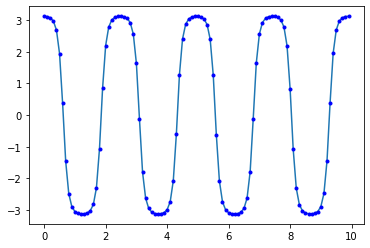

In [4]:
g=9.81
l=0.1
th0=179*pi/180
a=0.0
b=10.0
N=100 #número de pasos grandes
H=(b-a)/N #tamaño de los pasos
delta=1e-8

def f(r):
    th=r[0]
    omega=r[1]
    fth=omega
    fomega=-(g/l)*sin(th)
    return array([fth,fomega],float)

tpts=arange(a,b,H)
thpts=[]
r=array([th0,0.0],float)

for t in tpts:
    
    thpts.append(r[0])
    
    #aplicamos met pto medio modificado de paso H
    n=1
    r1= r + 0.5*H*f(r) #almacena la primera fila de la extrapolacion (contiene solo los pts meds modificados estimados)
    r2= r + H*f(r1)
    
    R1=empty([1,2],float)
    R1[0]=0.5*(r1 + r2 + 0.5*H*f(r2))
    
    #ahora, incrementamos n hasta que se llegue a la precisión deseada
    error = 2*H*delta
    
    while error > H*delta:
        
        n+=1
        h=H/n
        
        #met pto medio modificado
        r1= r + 0.5*h*f(r)
        r2= r + h*f(r1)
        for i in range (n-1):
            r1 += h*f(r2)
            r2 += h*f(r1)
    
        #calcula los estimados de la extrapolacio. Los arrays R1 y R2 
        #contienen las dos lineas más recientes de la tabla de extrapolaciones
    
        R2=R1
        R1=empty([n,2],float)
        R1[0]=0.5*(r1 + r2 + 0.5*h*f(r2))
        for m in range(1,n):
            epsilon = (R1[m-1] - R2[m-1])/((n/(n-1))**(2*m)-1)
            R1[m] = R1[m-1] + epsilon
        error = abs(epsilon[0])
        
    #hace r igual al valor estimado mas cercano obtenido antes de moverse al siguiente paso
    r = R1[n-1]
    
#graficando
plt.plot(tpts,thpts)
plt.plot(tpts,thpts,"b.")
plt.show()
    

